In [23]:
import zipfile
#import kaggle
import os
import requests
import json
from census import Census
from matplotlib import pyplot as plt
# Census API Key
from config import api_key
c = Census(api_key, year=2013)

import pandas as pd

In [ ]:
#os.system('kaggle datasets download -d starbucks/store-locations')

In [3]:
zip_file = os.path.join('Resources', 'store-locations.zip' )
zip_ref = zipfile.ZipFile(zip_file, 'r')
zip_ref.extractall('Resources')
zip_ref.close()

In [4]:
str_file = os.path.join('Resources','directory.csv')
str_df = pd.read_csv(str_file)
str_df.head(5)

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
0,Starbucks,47370-257954,"Meritxell, 96",Licensed,"Av. Meritxell, 96",Andorra la Vella,7,AD,AD500,376818720,GMT+1:00 Europe/Andorra,1.53,42.51
1,Starbucks,22331-212325,Ajman Drive Thru,Licensed,"1 Street 69, Al Jarf",Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.42
2,Starbucks,47089-256771,Dana Mall,Licensed,Sheikh Khalifa Bin Zayed St.,Ajman,AJ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,55.47,25.39
3,Starbucks,22126-218024,Twofour 54,Licensed,Al Salam Street,Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.38,24.48
4,Starbucks,17127-178586,Al Ain Tower,Licensed,"Khaldiya Area, Abu Dhabi Island",Abu Dhabi,AZ,AE,NaN,NaN,GMT+04:00 Asia/Dubai,54.54,24.51


In [5]:
str_df_us = str_df.loc[str_df['Country'] == 'US']
str_df_us.head()

,Brand,Store Number,Store Name,Ownership Type,Street Address,City,State/Province,Country,Postcode,Phone Number,Timezone,Longitude,Latitude
11964,Starbucks,3513-125945,Safeway-Anchorage #1809,Licensed,5600 Debarr Rd Ste 9,Anchorage,AK,US,995042300,907-339-0900,GMT-09:00 America/Anchorage,-149.78,61.21
11965,Starbucks,74352-84449,Safeway-Anchorage #2628,Licensed,1725 Abbott Rd,Anchorage,AK,US,995073444,907-339-2800,GMT-09:00 America/Anchorage,-149.84,61.14
11966,Starbucks,12449-152385,Safeway - Anchorage #1813,Licensed,1501 Huffman Rd,Anchorage,AK,US,995153596,907-339-1300,GMT-09:00 America/Anchorage,-149.85,61.11
11967,Starbucks,24936-233524,100th & C St - Anchorage,Company Owned,"320 W. 100th Ave, 100, Southgate Shopping Ctr ...",Anchorage,AK,US,99515,(907) 227-9631,GMT-09:00 America/Anchorage,-149.89,61.13
11968,Starbucks,8973-85630,Old Seward & Diamond,Company Owned,1005 E Dimond Blvd,Anchorage,AK,US,995152050,907-344-4160,GMT-09:00 America/Anchorage,-149.86,61.14


In [6]:
str_df_us['Postcode'].fillna(44406, inplace=True)

C:\Users\amite\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\pandas\core\generic.py:6130: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._update_inplace(new_data)


In [7]:
str_df_us['Zipcode'] = '00000'
str_df_us.Zipcode = str_df_us.Postcode.astype(str).str[0:5]
str_df_us.count()

C:\Users\amite\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.
C:\Users\amite\AppData\Local\Continuum\anaconda3\envs\PythonData\lib\site-packages\pandas\core\generic.py:5096: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self[name] = value


Brand             13608
Store Number      13608
Store Name        13608
Ownership Type    13608
Street Address    13608
City              13608
State/Province    13608
Country           13608
Postcode          13608
Phone Number      13122
Timezone          13608
Longitude         13608
Latitude          13608
Zipcode           13608
dtype: int64

In [8]:
census_data = c.acs5.get(("NAME", "B19013_001E", "B01003_001E", "B01002_001E",
                          "B19301_001E",
                          "B17001_002E",
                          "B23025_002E"), {'for': 'zip code tabulation area:*'})

# Convert to DataFrame
census_pd = pd.DataFrame(census_data)

# Column Reordering
census_pd = census_pd.rename(columns={"B01003_001E": "Population",
                                      "B01002_001E": "Median Age",
                                      "B19013_001E": "Household Income",
                                      "B19301_001E": "Per Capita Income",
                                      "B17001_002E": "Poverty Count",
                                      "B23025_002E": "Employment Labor Force",
                                      "NAME": "Name", "zip code tabulation area": "Zipcode"})

# Add in Poverty Rate (Poverty Count / Population)
census_pd["Poverty Rate"] = 100 * \
    census_pd["Poverty Count"].astype(
        int) / census_pd["Population"].astype(int)

# Final DataFrame
census_pd = census_pd[["Zipcode", "Population", "Median Age", "Household Income",
                       "Per Capita Income", "Poverty Count", "Employment Labor Force", "Poverty Rate"]]

census_pd.head()

,Zipcode,Population,Median Age,Household Income,Per Capita Income,Poverty Count,Employment Labor Force,Poverty Rate
0,08518,5217.0,41.5,74286.0,33963.0,170.0,3220.0,3.258578
1,08520,27468.0,37.4,90293.0,37175.0,1834.0,16187.0,6.676860
2,08525,4782.0,47.1,118656.0,59848.0,43.0,3004.0,0.899205
3,08527,54867.0,42.2,88588.0,37021.0,2191.0,29204.0,3.993293
4,08528,245.0,48.5,58676.0,49117.0,0.0,130.0,0.000000


In [9]:
data_df = census_pd.merge(str_df_us, how = 'outer', on="Zipcode")

In [44]:
data_df.count()

Zipcode                   41265
Population                40537
Median Age                40537
Household Income          40537
Per Capita Income         40297
Poverty Count             40537
Employment Labor Force    40537
Poverty Rate              40177
Brand                     13608
Store Number              13608
Store Name                13608
Ownership Type            13608
Street Address            13608
City                      13608
State/Province            13608
Country                   13608
Postcode                  13608
Phone Number              13122
Timezone                  13608
Longitude                 13608
Latitude                  13608
dtype: int64

In [45]:
#replacing all sisters concernt of Starbucks ('Teavana', 'Evolution Fresh','Coffee House Holdings') to Starbucks


data_df['Brand'] = data_df['Brand'].str.strip().replace("Teavana","Starbucks")
data_df['Brand'] = data_df['Brand'].str.strip().replace("Evolution Fresh","Starbucks")
data_df['Brand'] = data_df['Brand'].str.strip().replace("Coffee House Holdings","Starbucks")


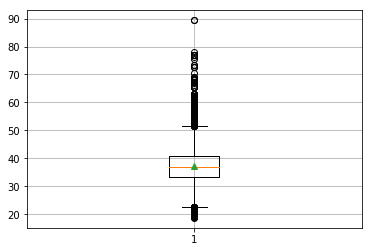

In [63]:
# Median age of Starbucks Zip code

type_df = data_df.loc[data_df["Brand"] == "Starbucks",:]

type_final_df = type_df[(type_df['Median Age'] >= 0)]

arr = type_final_df['Median Age']

plt.boxplot(arr, showmeans=True)

plt.grid()

plt.show()